# Python Programmer - Career Track

# Writing Functions in Python
Shayne Miel

## Best Practices

### Docstrings

A complex function

In [ ]:
def split_and_stack(df, new_names):
    half = int(len(df.columns) / 2)
    left = df.iloc[:, :half]
    right = df.iloc[:, half:]
    return pd.DataFrame(
        data=np.vstack([left.values, right.values]),
        columns=new_names
    )

In [ ]:
def split_and_stack(df, new_names):
    """Split a DataFrame's columns into two halves and then stack
    them vertically, returning a new DataFrame with `new_names`as thecolumn names.
    Args:
        df (DataFrame): The DataFrame to split.
        new_names (iterable of str): The column names for the new DataFrame.
    Returns:
        DataFrame
    """
    half = int(len(df.columns) / 2)
    left = df.iloc[:, :half]
    right = df.iloc[:, half:]
    return pd.DataFrame(
        data=np.vstack([left.values, right.values]),
        columns=new_names
    )

Anatomy of a docstring

In [ ]:
def function_name(arguments):
    """
    Description of what the function does.
    Description of the arguments, if any.
    Description of the return value(s), if any.
    Description of errors raised, if any.
    Optional extra notes or examples of usage.
    """

Docstring formats
- Google Style
- Numpydoc
- reStructuredText
- EpyText

Google Style - description

In [ ]:
def function(arg_1, arg_2=42):
    """Description of what the function does.
    """

Google style - arguments

In [ ]:
def function(arg_1, arg_2=42):
    """Description of what the function does.
    
    Args:
        arg_1 (str): Description of arg_1 that can break onto the next line
        if needed.
        arg_2 (int, optional): Write optional when an argument has a default
        value.
    """

Google style - return value(s)

In [ ]:
def function(arg_1, arg_2=42):
    """Description of what the function does.
    Args:
        arg_1 (str): Description of arg_1 that can break onto the next line
        if needed.
        arg_2 (int, optional): Write optional when an argument has a default
        value.
    Returns:
        bool: Optional description of the return value
        Extra lines are not indented.
    """

In [ ]:
def function(arg_1, arg_2=42):
    """Description of what the function does.
    
    Args:
        arg_1 (str): Description of arg_1 that can break onto the next line
        if needed.
        arg_2 (int, optional): Write optional when an argument has a default
        value.
    
    Returns:
        bool: Optional description of the return value
        Extra lines are not indented.
    
    Raises:
        ValueError: Include any error types that the function intentionally
        raises.
    
    Notes:
        See https://www.datacamp.com/community/tutorials/docstrings-python
        for more info.
    """

Numpydoc

In [ ]:
def function(arg_1, arg_2=42):
    """
    Description of what the function does.

    Parameters
    ----------
    arg_1 : expected type of arg_1
        Description of arg_1.
    arg_2 : int, optional
        Write optional when an argument has a default value.
        Default=42.
    
    Returns
    -------
    The type of the return value
        Can include a description of the return value.
        Replace "Returns" with "Yields" if this function is a generator.
    """

Retrieving docstrings

In [ ]:
def the_answer():
    """Return the answer to life,
    the universe, and everything.

    Returns:
    int
    """
    return 42

print(the_answer.__doc__)

# Return the answer to life,
#     the universe, and everything.

#     Returns:
#     int

In [ ]:
import inspect
print(inspect.getdoc(the_answer))

# Return the answer to life,
# the universe, and everything.

# Returns:
#     int

In [ ]:
#Example
def count_letter(content, letter):
  """Count the number of times `letter` appears in `content`.

  Args:
    content (str): The string to search.
    letter (str): The letter to search for.

  Returns:
    int

  # Add a section detailing what errors might be raised
  Raises:
    ValueError: If `letter` is not a one-character string.
  """
  if (not isinstance(letter, str)) or len(letter) != 1:
    raise ValueError('`letter` must be a single character string.')
  return len([char for char in content if char == letter])

In [ ]:
#Example
# Get the "count_letter" docstring by using an attribute of the function
docstring = count_letter.__doc__

border = '#' * 28
print('{}\n{}\n{}'.format(border, docstring, border))

import inspect

# Inspect the count_letter() function to get its docstring
docstring = inspect.getdoc(count_letter)

border = '#' * 28
print('{}\n{}\n{}'.format(border, docstring, border))

In [ ]:
#Example
import inspect

def build_tooltip(function):
  """Create a tooltip for any function that shows the
  function's docstring.

  Args:
    function (callable): The function we want a tooltip for.

  Returns:
    str
  """
  # Get the docstring for the "function" argument by using inspect
  docstring = inspect.getdoc(function)
  border = '#' * 28
  return '{}\n{}\n{}'.format(border, docstring, border)

print(build_tooltip(count_letter))
print(build_tooltip(range))
print(build_tooltip(print))

### DRY and "Do One Thing"

Don't repeat yourself (DRY)

In [ ]:
#train validate and test PCA of each one

train = pd.read_csv('train.csv')
train_y = train['labels'].values
train_X = train[col for col in train.columns if col != 'labels'].values
train_pca = PCA(n_components=2).fit_transform(train_X)
plt.scatter(train_pca[:,0], train_pca[:,1])

val = pd.read_csv('validation.csv')
val_y = val['labels'].values
val_X = val[col for col in val.columns if col != 'labels'].values
val_pca = PCA(n_components=2).fit_transform(val_X)
plt.scatter(val_pca[:,0], val_pca[:,1])

test = pd.read_csv('test.csv')
test_y = test['labels'].values
test_X = test[col for col in test.columns if col != 'labels'].values
test_pca = PCA(n_components=2).fit_transform(train_X)
plt.scatter(test_pca[:,0], test_pca[:,1])

The problem with repeating yourself

In [ ]:
#realy easy to make mistakes, such as do not change one parameter
train = pd.read_csv('train.csv')
train_y = train['labels'].values
train_X = train[col for col in train.columns if col != 'labels'].values
train_pca = PCA(n_components=2).fit_transform(train_X)
plt.scatter(train_pca[:,0], train_pca[:,1])

val = pd.read_csv('validation.csv')
val_y = val['labels'].values
val_X = val[col for col in val.columns if col != 'labels'].values
val_pca = PCA(n_components=2).fit_transform(val_X)
plt.scatter(val_pca[:,0], val_pca[:,1])

test = pd.read_csv('test.csv')
test_y = test['labels'].values
test_X = test[col for col in test.columns if col != 'labels'].values
test_pca = PCA(n_components=2).fit_transform(train_X) ### yikes! ###
plt.scatter(test_pca[:,0], test_pca[:,1])

Another problem with repeating yourself

In [ ]:
train = pd.read_csv('train.csv')
train_y = train['labels'].values ### <- there and there --v ###
train_X = train[col for col in train.columns if col != 'labels'].values
train_pca = PCA(n_components=2).fit_transform(train_X)
plt.scatter(train_pca[:,0], train_pca[:,1])

val = pd.read_csv('validation.csv')
val_y = val['labels'].values ### <- there and there --v ###
val_X = val[col for col in val.columns if col != 'labels'].values
val_pca = PCA(n_components=2).fit_transform(val_X)
plt.scatter(val_pca[:,0], val_pca[:,1])

test = pd.read_csv('test.csv')
test_y = test['labels'].values ### <- there and there --v ###
test_X = test[col for col in test.columns if col != 'labels'].values
test_pca = PCA(n_components=2).fit_transform(test_X)
plt.scatter(test_pca[:,0], test_pca[:,1])

Use functions to avoid repetition

In [ ]:
def load_and_plot(path):
    """Load a data set and plot the first two principal components.
    
    Args:
        path (str): The location of a CSV file.
    
    Returns:
        tuple of ndarray: (features, labels)
    """
    data = pd.read_csv(path)
    y = data['label'].values
    X = data[col for col in train.columns if col != 'label'].values
    pca = PCA(n_components=2).fit_transform(X)
    plt.scatter(pca[:,0], pca[:,1])
    return X, y

train_X, train_y = load_and_plot('train.csv')
val_X, val_y = load_and_plot('validation.csv')
test_X, test_y = load_and_plot('test.csv')

In [ ]:
def load_and_plot(path):
    """Load a data set and plot the first two principal components.
    
    Args:
        path (str): The location of a CSV file.
    
    Returns:
        tuple of ndarray: (features, labels)
    """
    
    # load the data
    data = pd.read_csv(path)
    y = data['label'].values
    X = data[col for col in train.columns if col != 'label'].values
    
    # plot the first two principle components
    pca = PCA(n_components=2).fit_transform(X)
    plt.scatter(pca[:,0], pca[:,1])
    
    # return loaded data
    return X, y

#the function do 3 things, and it violates the DO ONE THING principle of software engineering

Do One Thing

In [ ]:
def load_data(path):
    """Load a data set.
    
    Args:
        path (str): The location of a CSV file.
        
    Returns:
        tuple of ndarray: (features, labels)
    """
    data = pd.read_csv(path)
    y = data['labels'].values
    X = data[col for col in data.columns
             if col != 'labels'].values
    return X, y

In [ ]:
def plot_data(X):
    """Plot the first two principal components of a matrix.
    
    Args:
        X (numpy.ndarray): The data to plot.
    """
    pca = PCA(n_components=2).fit_transform(X)
    plt.scatter(pca[:,0], pca[:,1])

Advantages of doing one thing
- The code becomes:
- More exible
- More easily understood
- Simpler to test
- Simpler to debug
- Easier to change

Code smells and refactoring
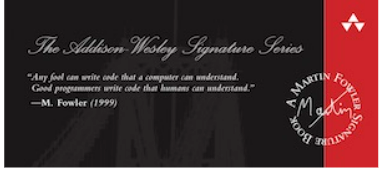
book for software engineering

In [ ]:
#Example
def standardize(column):
  """Standardize the values in a column.

  Args:
    column (pandas Series): The data to standardize.

  Returns:
    pandas Series: the values as z-scores
  """
  # Finish the function so that it returns the z-scores
  z_score = (column - column.mean()) / column.std()
  return z_score

# Use the standardize() function to calculate the z-scores
df['y1_z'] = standardize(df["y1_gpa"])
df['y2_z'] = standardize(df["y2_gpa"])
df['y3_z'] = standardize(df["y3_gpa"])
df['y4_z'] = standardize(df["y4_gpa"])

In [ ]:
#Example
def mean(values):
  """Get the mean of a sorted list of values

  Args:
    values (iterable of float): A list of numbers

  Returns:
    float
  """
  # Write the mean() function
  mean = sum(values) / len(values)
  return mean

In [ ]:
def median(values):
  """Get the median of a sorted list of values

  Args:
    values (iterable of float): A list of numbers

  Returns:
    float
  """
  # Write the median() function
  midpoint = int(len(values) / 2)
  if len(values) % 2 == 0:
    median = (values[midpoint - 1] + values[midpoint]) / 2
  else:
    median = values[midpoint]
  return median

### Pass by assignment

A surprising example

In [ ]:
def foo(x):
    x[0] = 99
    
my_list = [1, 2, 3]

foo(my_list)

print(my_list)
# [99, 2, 3] #objects (such as lists) are multable

In [ ]:
def bar(x):
    x = x + 90
    
my_var = 3

bar(my_var)

print(my_var)
# 3 #integers are imutable

Digging deeper

In [ ]:
a = [1, 2, 3]
b = a
a.append(4)
print(b)
# [1, 2, 3, 4]

b.append(5)
print(a)
# [1, 2, 3, 4, 5]

a = 42

#initially, a equals to b, and if changes a or b, it will change one another. 
#but when change a to another value, it will not change b

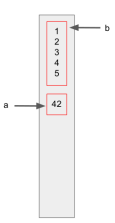

Pass by assignment

In [ ]:
def foo(x):
    x[0] = 99
    
my_list = [1, 2, 3]

foo(my_list)

print(my_list)
# [99, 2, 3]

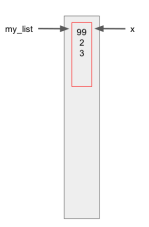

In [ ]:
def bar(x):
    x = x + 90

my_var = 3

bar(my_var)

my_var
# 3

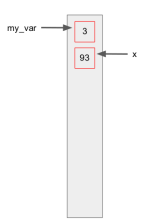

Immutable or Mutable?
- Immutable
    - int
    - float
    - bool
    - string
    - bytes
    - tuple
    - frozenset
    - None
- Mutable
    - list
    - dict
    - set
    - bytearray
    - objects
    - functions
    - almost everything else!

Mutable default arguments are dangerous!

In [ ]:
def foo(var=[]):
    var.append(1)
    return var

foo()
# [1]

foo()
# [1, 1]

In [ ]:
def foo(var=None):
    if var is None:
        var = []
    var.append(1)
    return var

foo()
# [1]

foo()
# [1]

In [ ]:
#Example
def store_lower(_dict, _string):
  """Add a mapping between `_string` and a lowercased version of `_string` to `_dict`

  Args:
    _dict (dict): The dictionary to update.
    _string (str): The string to add.
  """
  orig_string = _string
  _string = _string.lower()
  _dict[orig_string] = _string

d = {}
s = 'Hello'

store_lower(d, s)

#d = {'Hello': 'hello'}, s = 'Hello' -- string is immutable

In [ ]:
#Example
# Use an immutable variable for the default argument
def better_add_column(values, df=None):
  """Add a column of `values` to a DataFrame `df`.
  The column will be named "col_<n>" where "n" is
  the numerical index of the column.

  Args:
    values (iterable): The values of the new column
    df (DataFrame, optional): The DataFrame to update.
      If no DataFrame is passed, one is created by default.

  Returns:
    DataFrame
  """
  # Update the function to create a default DataFrame
  if df is None:
    df = pandas.DataFrame()
  df['col_{}'.format(len(df.columns))] = values
  return df

#Use the None to avoid mutable problems

## Context Managers

### Using context managers

What is a context manager?
A context manager:
- Sets up a context
- Runs your code
- Removes the context

A catered party
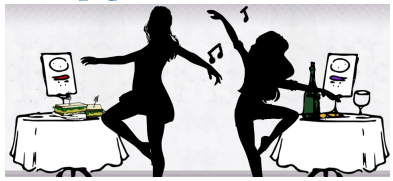

Context managers:
- Set up a context
- Run your code
- Remove the context

Caterers:
- Set up the tables with food and drink
- Let you and your friends have a party
- Cleaned up and removed the tables

A real-world example

In [ ]:
with open('my_file.txt') as my_file:
    text = my_file.read()
    length = len(text)
    
print('The file is {} characters long'.format(length))

open() does three things:
- Sets up a context by opening a file
- Lets you run any code you want on that file
- Removes the context by closing the file

Using a context manager

In [ ]:
with <context-manager>(<args>) as <variable-name>:
    # Run your code here
    # This code is running "inside the context"
    
# This code runs after the context is removed

In [ ]:
with open('my_file.txt') as my_file: #assign the variable to my_file
    text = my_file.read()
    length = len(text)
    
print('The file is {} characters long'.format(length))

In [ ]:
#Example
# Open "alice.txt" and assign the file to "file"
with open('alice.txt') as file:
  text = file.read()

n = 0
for word in text.split():
  if word.lower() in ['cat', 'cats']:
    n += 1

print('Lewis Carroll uses the word "cat" {} times'.format(n))
#<script.py> output:
#     Lewis Carroll uses the word "cat" 24 times

In [ ]:
#Example
image = get_image_from_instagram()

# Time how long process_with_numpy(image) takes to run
with timer(): #does not need an as to create a variabel
  print('Numpy version')
  process_with_numpy(image)

# Time how long process_with_pytorch(image) takes to run
with timer():
  print('Pytorch version')
  process_with_pytorch(image)
    
# <script.py> output:
#     Numpy version
#     Processing..........done!
#     Elapsed: 1.52 seconds
#     Pytorch version
#     Processing..........done!
#     Elapsed: 0.34 seconds

### Writing context managers

Two ways to define a context manager
- Class-based
- Function-based (focus on this one)

How to create a context manager

In [ ]:
def my_context():
    # Add any set up code you need - not required
    
    yield #special kind of function
    
    # Add any teardown code you need (clean up the context here)

1. Dene a function.
2. (optional) Add any set up code your context needs.
3. Use the "yield" keyword.
4. (optional) Add any teardown code your context needs.

How to create a context manager

In [ ]:
@contextlib.contextmanager #contextlib module
def my_context():
    # Add any set up code you need
    yield
    # Add any teardown code you need

1. Dene a function.
2. (optional) Add any set up code your context needs.
3. Use the "yield" keyword.
4. (optional) Add any teardown code your context needs.
5. Add the `@contextlib.contextmanager` decorator.

The "yield" keyword

In [ ]:
@contextlib.contextmanager
def my_context():
    print('hello')
    yield 42
    print('goodbye')

with my_context() as foo:
    print('foo is {}'.format(foo))

# hello
# foo is 42
# goodbye

Setup and teardown

In [ ]:
@contextlib.contextmanager
def database(url):
    # set up database connection
    db = postgres.connect(url)
    
    yield db
    # tear down database connection
    db.disconnect() #disconnect from the database
    
url = 'http://datacamp.com/data'
with database(url) as my_db:
    course_list = my_db.execute(
        'SELECT * FROM courses'
    )

In [ ]:
@contextlib.contextmanager
def in_dir(path):
    # save current working directory
    old_dir = os.getcwd()
    
    # switch to new working directory
    os.chdir(path)
    
    yield
   
    # change back to previous
    # working directory
    os.chdir(old_dir)
    
    with in_dir('/data/project_1/'):
        project_files = os.listdir()

In [ ]:
#Example
# Add a decorator that will make timer() a context manager
@contextlib.contextmanager
def timer():
  """Time the execution of a context block.

  Yields:
    None
  """
  start = time.time()
  # Send control back to the context block
  yield
  end = time.time()
  print('Elapsed: {:.2f}s'.format(end - start))

with timer():
  print('This should take approximately 0.25 seconds')
  time.sleep(0.25)

# <script.py> output:
#     This should take approximately 0.25 seconds
#     Elapsed: 0.25s

Notice that the three elements of a context manager are all here: a function definition, a yield statement, and the @contextlib.contextmanager decorator. It's also worth noticing that timer() is a context manager that does not return an explicit value, so yield is written by itself without specifying anything to return.

A read-only open() context manager


You have a bunch of data files for your next deep learning project that took you months to collect and clean. It would be terrible if you accidentally overwrote one of those files when trying to read it in for training, so you decide to create a read-only version of the open() context manager to use in your project.

The regular open() context manager:

- takes a filename and a mode ('r' for read, 'w' for write, or 'a' for append)
- opens the file for reading, writing, or appending
- yields control back to the context, along with a reference to the file
- waits for the context to finish
- and then closes the file before exiting

Your context manager will do the same thing, except it will only take the filename as an argument and it will only open the file for reading.

In [ ]:
#Example
@contextlib.contextmanager
def open_read_only(filename):
  """Open a file in read-only mode.

  Args:
    filename (str): The location of the file to read

  Yields:
    file object
  """
  read_only_file = open(filename, mode='r')
  # Yield read_only_file so it can be assigned to my_file
  yield read_only_file
  # Close read_only_file
  read_only_file.close()

with open_read_only('my_file.txt') as my_file:
  print(my_file.read())

# <script.py> output:
#     Congratulations! You wrote a context manager that acts like "open()" but operates in read-only mode!

### Advanced topics

Nested contexts

In [ ]:
def copy(src, dst):
    """Copy the contents of one file to another.
    
    Args:
        src (str): File name of the file to be copied.
        dst (str): Where to write the new file.
    """
    # Open the source file and read in the contents
    with open(src) as f_src:
        contents = f_src.read()
    # Open the destination file and write out the contents
    with open(dst,'w') as f_dst:
        f_dst.write(contents)

In [ ]:
with open('my_file.txt') as my_file: #open one line at time
    for line in my_file:
        # do something

In [ ]:
def copy(src, dst):
    """Copy the contents of one file to another.
    
    Args:
        src (str): File name of the file to be copied.
        dst (str): Where to write the new file.
    """
    # Open both files
    with open(src) as f_src:
        with open(dst, 'w') as f_dst:
            # Read and write each line, one at a time
            for line in f_src:
                f_dst.write(line)

Handling errors

In [ ]:
def get_printer(ip):
    p = connect_to_printer(ip)
    yield
    # This MUST be called or no one else will
    # be able to connect to the printer
    p.disconnect()
    print('disconnected from printer')
    
doc = {'text': 'This is my text.'}

with get_printer('10.0.34.111') as printer:
    printer.print_page(doc['txt'])
       
# Traceback (most recent call last):
#     File "<stdin>", line 1, in <module>
#         printer.print_page(doc['txt'])
# KeyError: 'txt

Handling errors

In [ ]:
try:
    # code that might raise an error
except:
    # do something about the error
finally:
    # this code runs no matter what

In [ ]:
def get_printer(ip):
p = connect_to_printer(ip)

    try:
        yield
    finally:
        p.disconnect()
        print('disconnected from printer')

doc = {'text': 'This is my text.'}
with get_printer('10.0.34.111') as printer:
    printer.print_page(doc['txt'])
       
# disconnected from printer
# Traceback (most recent call last):
#     File "<stdin>", line 1, in <module>
#         printer.print_page(doc['txt'])
# KeyError: 'txt'

Context manager patterns
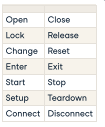
Adapted from Dave Brondsema's talk at PyCon 2012:
- https://youtu.be/cSbD5SKwak0?t=795

In [ ]:
#Example
# Use the "stock('NVDA')" context manager
# and assign the result to the variable "nvda"
with stock('NVDA') as nvda:
  # Open 'NVDA.txt' for writing as f_out
  with open('NVDA.txt', 'w') as f_out:
    for _ in range(10):
      value = nvda.price()
      print('Logging ${:.2f} for NVDA'.format(value))
      f_out.write('{:.2f}\n'.format(value))

In [ ]:
#Example
def in_dir(directory):
  """Change current working directory to `directory`,
  allow the user to run some code, and change back.

  Args:
    directory (str): The path to a directory to work in.
  """
  current_dir = os.getcwd()
  os.chdir(directory)

  # Add code that lets you handle errors
  try:
    yield
  # Ensure the directory is reset,
  # whether there was an error or not
  finally:
    os.chdir(current_dir)

## Decorators

### Functions are objects

Functions are just another type of object
Python objects:

In [ ]:
def x():
    pass
x = [1, 2, 3]
x = {'foo': 42}
x = pandas.DataFrame()
x = 'This is a sentence.'
x = 3
x = 71.2
import x

Functions as variables - this is surprising

In [ ]:
def my_function():
    print('Hello')
x = my_function
type(x)
# <type 'function'>

x()
# Hello

PrintyMcPrintface = print
PrintyMcPrintface('Python is awesome!')
# Python is awesome!

Lists and dictionaries of functions

In [ ]:
list_of_functions = [my_function, open, print]
list_of_functions[2]('I am printing with an element of a list!')
# I am printing with an element of a list!

dict_of_functions = {
    'func1': my_function,
    'func2': open,
    'func3': print
}
dict_of_functions['func3']('I am printing with a value of a dict!')
# I am printing with a value of a dict!

Referencing a function

In [ ]:
def my_function():
    return 42
x = my_function
my_function()
# 42

my_function
# <function my_function at 0x7f475332a730>

Functions as arguments

In [ ]:
def has_docstring(func):
    """Check to see if the function
    `func` has a docstring.

    Args:
        func (callable): A function.
    
    Returns:
        bool
    """
return func.__doc__is not None

In [ ]:
def no():
    return 42

def yes():
    """Return the value 42
    """
    return 42

has_docstring(no)
# False
has_docstring(yes)
# True

Defining a function inside another function

In [ ]:
def foo():
    x = [3, 6, 9]

    def bar(y):
        print(y)

    for value in x:
        bar(x)

In [ ]:
def foo(x, y):
    if x > 4 and x < 10 and y > 4 and y < 10:
        print(x * y)

def foo(x, y): #makes the code easier to read
    def in_range(v): 
        return v > 4 and v < 10

if in_range(x) and in_range(y):
    print(x * y)

Functions as return values

In [ ]:
def get_function():
    def print_me(s):
        print(s)
    return print_me
new_func = get_function()
new_func('This is a sentence.')
# This is a sentence.

In [ ]:
#Example
# Add the missing function references to the function map
function_map = {
  'mean': mean,
  'std': std,
  'minimum': minimum,
  'maximum': maximum
}

data = load_data()
print(data)

func_name = get_user_input()

# Call the chosen function and pass "data" as an argument
function_map[func_name](data)

# <script.py> output:
#        height  weight
#     0    72.1     198
#     1    69.8     204
#     2    63.2     164
#     3    64.7     238
#     Type a command: 
#     > minimum
#     height     63.2
#     weight    164.0
#     dtype: float64

In [ ]:
#Example
# Call has_docstring() on the load_and_plot_data() function
ok = has_docstring(load_and_plot_data)

if not ok:
  print("load_and_plot_data() doesn't have a docstring!")
else:
  print("load_and_plot_data() looks ok")

# Call has_docstring() on the as_2D() function
ok = has_docstring(as_2D)

if not ok:
  print("as_2D() doesn't have a docstring!")
else:
  print("as_2D() looks ok")

# Call has_docstring() on the log_product() function
ok = has_docstring(log_product)

if not ok:
  print("log_product() doesn't have a docstring!")
else:
  print("log_product() looks ok")

In [ ]:
#Example
def create_math_function(func_name):
  if func_name == 'add':
    def add(a, b):
      return a + b
    return add
  elif func_name == 'subtract':
    # Define the subtract() function
    def subtract (a,b):
      return a - b
    return subtract
  else:
    print("I don't know that one")
    
add = create_math_function('add')
print('5 + 2 = {}'.format(add(5, 2)))

subtract = create_math_function('subtract')
print('5 - 2 = {}'.format(subtract(5, 2)))

### Scope

Names
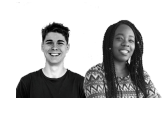
Scope
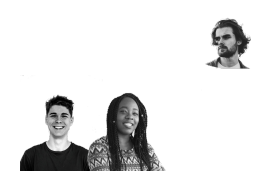

Scope

In [ ]:
x = 7
y = 200
print(x)
# 7

def foo():
    x = 42
    print(x)
    print(y)

foo()
# 42 # do not change the value of x outside the function
# 200

print(x)
# 7

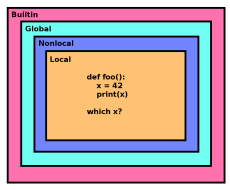

The global keyword

In [ ]:
x = 7
def foo():
    x = 42
    print(x)
foo()
# 42
print(x)
# 7

In [ ]:
x = 7
def foo():
    global x
    x = 42
    print(x)
foo()
# 42
print(x)
# 42

The nonlocal keyword

In [ ]:
def foo():
    x = 10
    def bar():
        x = 200
        print(x)
    bar()
    print(x)
foo()
# 200
# 10

In [ ]:
def foo():
    x = 10
    def bar():
        nonlocal x
        x = 200
        print(x)
    bar()
    print(x)
foo()
# 200
# 200

In [ ]:
#Example
x = 50

def one():
  x = 10

def two():
  global x
  x = 30

def three():
  x = 100
  print(x)

for func in [one, two, three]:
  func()
  print(x)
    
#50, 30, 100, 30

- Good job! one() doesn't change the global x, so the first print() statement prints 50.
- two() does change the global x so the second print() statement prints 30.
- The print() statement inside the function three() is referencing the x value that is local to three(), so it prints 100.
- But three() does not change the global x value so the last print() statement prints 30 again.

In [ ]:
#Example
call_count = 0

def my_function():
  # Use a keyword that lets us update call_count 
  global call_count
  call_count += 1
  
  print("You've called my_function() {} times!".format(
    call_count
  ))
  
for _ in range(20):
  my_function()

def read_files():
  file_contents = None
  
  def save_contents(filename):
    # Add a keyword that lets us modify file_contents
    nonlocal file_contents
    if file_contents is None:
      file_contents = []
    with open(filename) as fin:
      file_contents.append(fin.read())
      
  for filename in ['1984.txt', 'MobyDick.txt', 'CatsEye.txt']:
    save_contents(filename)
    
  return file_contents

print('\n'.join(read_files()))

def wait_until_done():
  def check_is_done():
    # Add a keyword so that wait_until_done() 
    # doesn't run forever
    global done
    if random.random() < 0.1:
      done = True
      
  while not done:
    check_is_done()

done = False
wait_until_done()

print('Work done? {}'.format(done))

### Closures

Attaching nonlocal variables to nested functions

In [ ]:
def foo():
    a = 5
    def bar():
        print(a)
    return bar
func = foo()
func()
# 5

In [ ]:
# Closures!
type(func.__closure__)
# <class 'tuple'>
len(func.__closure__)
# 1
func.__closure__[0].cell_contents
# 5

Closures and deletion

In [ ]:
x = 25
def foo(value):
    def bar():
        print(value)
    return bar
my_func = foo(x)
my_func()
# 25

del(x)
my_func()
# 25

In [ ]:
len(my_func.__closure__)
# 1

my_func.__closure__[0].cell_contents
# 25

Closures and overwriting

In [ ]:
x = 25
def foo(value):
    def bar():
        print(value)
    return bar
x = foo(x)
x()
# 25

In [ ]:
len(x.__closure__) #tem um valor no closure, que segue sendo o 25
# 1

x.__closure__[0].cell_contents
# 25

Definitions - nested function
Nested function: A function defined inside another function.

In [ ]:
# outer function
def parent():
    # nested function
    def child():
        pass
return child

Definitions - nonlocal variables

Nonlocal variables: Variables defined in the parent function that are used by the child function

In [ ]:
def parent(arg_1, arg_2):
    # From child()'s point of view,
    # `value` and `my_dict` are nonlocal variables,
    # as are`arg_1`and `arg_2`.
    value = 22
    my_dict = {'chocolate': 'yummy'}

    def child():
        print(2 * value)
        print(my_dict['chocolate'])
        print(arg_1 + arg_2)
    
return child

Closure: Nonlocal variables attached to a returned function

In [ ]:
def parent(arg_1, arg_2):
    value = 22
    my_dict = {'chocolate': 'yummy'}
    def child():
        print(2 * value)
        print(my_dict['chocolate'])
        print(arg_1 + arg_2)
    return child

new_function = parent(3, 4)
print([cell.cell_contents for cell in new_function.__closure__])

# [3, 4, 22, {'chocolate': 'yummy'}]

Why does all of this matter?

Decorators use:
- Functions as objects
- Nested functions
- Nonlocal scope
- Closures

In [ ]:
#Example
def return_a_func(arg1, arg2):
  def new_func():
    print('arg1 was {}'.format(arg1))
    print('arg2 was {}'.format(arg2))
  return new_func
    
my_func = return_a_func(2, 17)

# Show that my_func()'s closure is not None
print(my_func.__closure__ is not None)

# Show that there are two variables in the closure
print(len(my_func.__closure__) == 2)

# Get the values of the variables in the closure
closure_values = [
  my_func.__closure__[i].cell_contents for i in range(2)
]
print(closure_values == [2, 17])

In [ ]:
#Example
def my_special_function():
  print('You are running my_special_function()')
  
def get_new_func(func):
  def call_func():
    func()
  return call_func

new_func = get_new_func(my_special_function)

# Redefine my_special_function() to just print "hello"
def my_special_function():
  print("hello")

new_func()

#Example part 2
def my_special_function():
  print('You are running my_special_function()')
  
def get_new_func(func):
  def call_func():
    func()
  return call_func

new_func = get_new_func(my_special_function)

# Delete my_special_function()
del my_special_function

new_func()

#Example part 3
def my_special_function():
  print('You are running my_special_function()')
  
def get_new_func(func):
  def call_func():
    func()
  return call_func

# Overwrite `my_special_function` with the new function
my_special_function = get_new_func(my_special_function)

my_special_function()

### Decorators

Functions
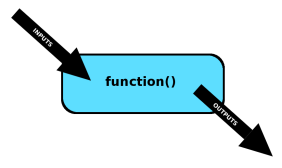

Decorators (changes function behavior)
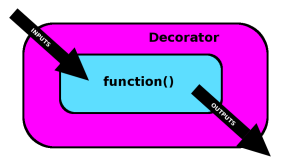

Modify inputs
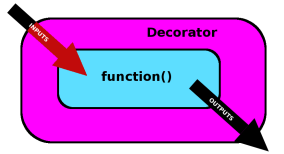

Modify outputs
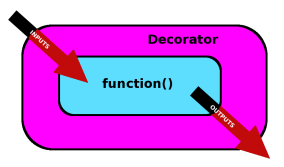

Modify function
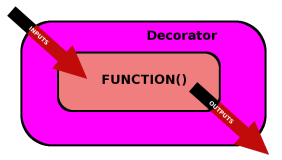

What does a decorator look like?

In [ ]:
@double_args #decorator name - multiply by two all arguments
def multiply(a, b):
    return a * b
multiply(1, 5)
# 20

The double_args decorator

In [ ]:
def multiply(a, b):
    return a * b
def double_args(func):
    return func
new_multiply = double_args(multiply)
new_multiply(1, 5)
# 5
multiply(1, 5)
# 5

The double_args decorator

In [ ]:
def multiply(a, b):
    return a * b
def double_args(func):
# Define a new function that we can modify
    def wrapper(a, b):
    # For now, just call the unmodified function
        return func(a, b)
    # Return the new function
    return wrapper
new_multiply = double_args(multiply)
new_multiply(1, 5)
# 5

In [ ]:
def multiply(a, b):
    return a * b
def double_args(func):
    def wrapper(a, b):
    # Call the passed in function, but double each argument
        return func(a * 2, b * 2)
    return wrapper
new_multiply = double_args(multiply)
new_multiply(1, 5)
# 20

In [ ]:
def multiply(a, b):
    return a * b
def double_args(func):
    def wrapper(a, b):
        return func(a * 2, b * 2)
    return wrapper
multiply = double_args(multiply)
multiply(1, 5)
# 20

multiply.__closure__[0].cell_contents
# <function multiply at 0x7f0060c9e620>

Decorator syntax (both are equivalent)

In [ ]:
def double_args(func):
    def wrapper(a, b):
        return func(a * 2, b * 2)
    return wrapper

def multiply(a, b):
    return a * b

multiply = double_args(multiply)

multiply(1, 5)
# 20

In [ ]:
def double_args(func):
    def wrapper(a, b):
        return func(a * 2, b * 2)
    return wrapper

@double_args
def multiply(a, b):
    return a * b

multiply(1, 5)
# 20

In [ ]:
#Example
def my_function(a, b, c):
  print(a + b + c)

# Decorate my_function() with the print_args() decorator
my_function = print_args(my_function)

my_function(1, 2, 3)

#Example
# Decorate my_function() with the print_args() decorator
@print_args
def my_function(a, b, c):
  print(a + b + c)

my_function(1, 2, 3)

In [ ]:
#Example
def print_before_and_after(func):
  def wrapper(*args):
    print('Before {}'.format(func.__name__))
    # Call the function being decorated with *args
    func(*args)
    print('After {}'.format(func.__name__))
  # Return the nested function
  return wrapper

@print_before_and_after
def multiply(a, b):
  print(a * b)

multiply(5, 10)

## More on Decorators

### Real-world examples

Time a function

In [ ]:
import time
def timer(func):
    """A decorator that prints how long a function took to run.
    
    Args:
        func (callable): The function being decorated.
        
    Returns:
        callable: The decorated function.
    """

In [ ]:
import time

def timer(func):
"""A decorator that prints how long a function took to run."""
    # Define the wrapper function to return.
    def wrapper(*args, **kwargs):
        # When wrapper() is called, get the current time.
        t_start = time.time()
        
        # Call the decorated function and store the result.
        result = func(*args, **kwargs)
        
        # Get the total time it took to run, and print it.
        t_total = time.time() - t_start
        print('{} took {}s'.format(func.__name__, t_total))
        
        return result

    return wrapper

Using timer()

In [ ]:
@timer
def sleep_n_seconds(n):
    time.sleep(n)
sleep_n_seconds(5)
# sleep_n_seconds took 5.0050950050354s

sleep_n_seconds(10)
# sleep_n_seconds took 10.010067701339722s

In [ ]:
def memoize(func):
    """Store the results of the decorated function for fast lookup
    """
    # Store results in a dict that maps arguments to results
    cache = {}
    
    # Define the wrapper function to return.
    def wrapper(*args, **kwargs):
        # If these arguments haven't been seen before,
        if (args, kwargs) not in cache:
            # Call func() and store the result.
            cache[(args, kwargs)] = func(*args, **kwargs)
        return cache[(args, kwargs)]
    return wrapper

In [ ]:
@memoize
def slow_function(a, b):
    print('Sleeping...')
    time.sleep(5)
    return a + b

slow_function(3, 4)
# Sleeping...
# 7

slow_function(3, 4)
# 7 #immediately returns, already in the cache

When to use decorators
- Add common behavior to multiple functions

In [ ]:
@timer
def foo():
    # do some computation
    
@timer
def bar():
    # do some other computation

@timer
def baz():
    # do something else

In [ ]:
#Example
def print_return_type(func):
  # Define wrapper(), the decorated function
  def wrapper(*args, **kwargs):
    # Call the function being decorated
    result = func(*args, **kwargs)
    print('{}() returned type {}'.format(
      func.__name__, type(result)
    ))
    return result
  # Return the decorated function
  return wrapper
  
@print_return_type
def foo(value):
  return value
  
print(foo(42))
print(foo([1, 2, 3]))
print(foo({'a': 42}))

# <script.py> output:
#     foo() returned type <class 'int'>
#     42
#     foo() returned type <class 'list'>
#     [1, 2, 3]
#     foo() returned type <class 'dict'>
#     {'a': 42}

In [ ]:
#Example
def counter(func):
  def wrapper(*args, **kwargs):
    wrapper.count += 1
    # Call the function being decorated and return the result
    return func(*args, **kwargs)
  wrapper.count = 0
  # Return the new decorated function
  return wrapper

# Decorate foo() with the counter() decorator
@counter
def foo():
  print('calling foo()')
  
foo()
foo()

print('foo() was called {} times.'.format(foo.count))

# <script.py> output:
#     calling foo()
#     calling foo()
#     foo() was called 2 times.

### Decorators and metadata

In [ ]:
def sleep_n_seconds(n=10):
    """Pause processing for n seconds.
    
    Args:
        n (int): The number of seconds to pause for.
    """
    time.sleep(n)
print(sleep_n_seconds.__doc__)

# Pause processing for n seconds.
#     Args:
#         n (int): The number of seconds to pause for.

In [ ]:
def sleep_n_seconds(n=10):
    """Pause processing for n seconds.
    
    Args:
        n (int): The number of seconds to pause for.
    """
time.sleep(n)

print(sleep_n_seconds.__name__)
# sleep_n_seconds

print(sleep_n_seconds.__defaults__)
# (10,)

In [ ]:
@timer
def sleep_n_seconds(n=10):
    """Pause processing for n seconds.

    Args:
        n (int): The number of seconds to pause for.
    """
time.sleep(n)
print(sleep_n_seconds.__doc__)
#nothing on output

print(sleep_n_seconds.__name__)
# wrapper

The timer decorator

In [ ]:
def timer(func):
    """A decorator that prints how long a function took to run."""
    def wrapper(*args, **kwargs):
        t_start = time.time()
        
        result = func(*args, **kwargs)
        
        t_total = time.time() - t_start

    print('{} took {}s'.format(func.__name__, t_total))
    
    return result

return wrapper

In [ ]:
from functools import wraps
def timer(func):
    """A decorator that prints how long a function took to run."""

    @wraps(func)
    def wrapper(*args, **kwargs):
        
        t_start = time.time()
        
        result = func(*args, **kwargs)
        
        t_total = time.time() - t_start
        
        print('{} took {}s'.format(func.__name__, t_total))
        
        return result
    
    return wrapper

In [ ]:
@timer
def sleep_n_seconds(n=10):
    """Pause processing for n seconds.
    Args:
        n (int): The number of seconds to pause for.
    """
    time.sleep(n)
    
print(sleep_n_seconds.__doc__)
# Pause processing for n seconds.
# Args:
#     n (int): The number of seconds to pause for.

In [ ]:
@timer
def sleep_n_seconds(n=10):
    """Pause processing for n seconds.
    Args:
        n (int): The number of seconds to pause for.
    """
    time.sleep(n)

print(sleep_n_seconds.__name__)
# sleep_n_seconds

print(sleep_n_seconds.__defaults__)
# (10,)

Access to the original function

In [ ]:
@timer
def sleep_n_seconds(n=10):
    """Pause processing for n seconds.

    Args:
        n (int): The number of seconds to pause for.
    """
    time.sleep(n)

sleep_n_seconds.__wrapped__
# <function sleep_n_seconds at 0x7f52cab44ae8>

In [ ]:
#Example
from functools import wraps

def add_hello(func):
  # Decorate wrapper() so that it keeps func()'s metadata
  @wraps(func)
  def wrapper(*args, **kwargs):
    """Print 'hello' and then call the decorated function."""
    print('Hello')
    return func(*args, **kwargs)
  return wrapper
  
@add_hello
def print_sum(a, b):
  """Adds two numbers and prints the sum"""
  print(a + b)
  
print_sum(10, 20)
print_sum_docstring = print_sum.__doc__
print(print_sum_docstring)

In [ ]:
#Example
@check_everything
def duplicate(my_list):
  """Return a new list that repeats the input twice"""
  return my_list + my_list

t_start = time.time()
duplicated_list = duplicate(list(range(50)))
t_end = time.time()
decorated_time = t_end - t_start

t_start = time.time()
# Call the original function instead of the decorated one
duplicated_list = duplicate.__wrapped__(list(range(50)))
t_end = time.time()
undecorated_time = t_end - t_start

print('Decorated time: {:.5f}s'.format(decorated_time))
print('Undecorated time: {:.5f}s'.format(undecorated_time))

# <script.py> output:
#     Finished checking inputs
#     Finished checking outputs
#     Decorated time: 1.52937s
#     Undecorated time: 0.00023s

### Decorators that take arguments

In [ ]:
def run_three_times(func):
    def wrapper(*args, **kwargs):
        for i in range(3):
            func(*args, **kwargs)
    return wrapper

@run_three_times
def print_sum(a, b):
    print(a + b)
print_sum(3, 5)
# 8
# 8
# 8

run_n_times()

In [ ]:
#decorators are only supposed to run one argument (the function that is decorating)
def run_n_times(func):
    def wrapper(*args, **kwargs):
    # How do we pass "n" into this function?
        for i in range(???):
            func(*args, **kwargs)
    return wrapper

@run_n_times(3)
def print_sum(a, b):
    print(a + b)

@run_n_times(5)
def print_hello():
    print('Hello!')

A decorator factory

In [ ]:
def run_n_times(n):
    """Define and return a decorator"""
    def decorator(func):
        def wrapper(*args, **kwargs):
            for i in range(n):
                func(*args, **kwargs)
        return wrapper
    return decorator
    
@run_n_times(3)
def print_sum(a, b):
    print(a + b)

In [ ]:
def run_n_times(n):
    """Define and return a decorator"""
    def decorator(func):
        def wrapper(*args, **kwargs):
            for i in range(n):
                func(*args, **kwargs)
        return wrapper
    return decorator
run_three_times = run_n_times(3)

@run_three_times
def print_sum(a, b):
    print(a + b)

@run_n_times(3)
def print_sum(a, b):
    print(a + b)

Using run_n_times()

In [ ]:
@run_n_times(3)
def print_sum(a, b):
    print(a + b)
print_sum(3, 5)
# 8
# 8
# 8

In [ ]:
@run_n_times(5)
def print_hello():
    print('Hello!')
print_hello()
# Hello!
# Hello!
# Hello!
# Hello!
# Hello!

In [ ]:
#Example

# Make print_sum() run 10 times with the run_n_times() decorator
@run_n_times(10)
def print_sum(a, b):
  print(a + b)
  
print_sum(15, 20)

# <script.py> output:
#     35
#     35
#     35
#     35
#     35
#     35
#     35
#     35
#     35
#     35

# Use run_n_times() to create the run_five_times() decorator
run_five_times = run_n_times(5)

@run_five_times
def print_sum(a, b):
  print(a + b)
  
print_sum(4, 100)
# <script.py> output:
#     104
#     104
#     104
#     104
#     104

# Modify the print() function to always run 20 times
print = run_n_times(20)(print)

# print('What is happening?!?!')
# <script.py> output:
#     What is happening?!?!
#     What is happening?!?!
#     What is happening?!?!
#     What is happening?!?!
#     What is happening?!?!
#     What is happening?!?!
#     What is happening?!?!
#     What is happening?!?!
#     What is happening?!?!
#     What is happening?!?!
#     What is happening?!?!
#     What is happening?!?!
#     What is happening?!?!
#     What is happening?!?!
#     What is happening?!?!
#     What is happening?!?!
#     What is happening?!?!
#     What is happening?!?!
#     What is happening?!?!
#     What is happening?!?!

In [ ]:
#Example
def html(open_tag, close_tag):
  def decorator(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
      msg = func(*args, **kwargs)
      return '{}{}{}'.format(open_tag, msg, close_tag)
    # Return the decorated function
    return wrapper
  # Return the decorator
  return decorator

# Make hello() return bolded text
@html("<b>", "</b>")
def hello(name):
  return 'Hello {}!'.format(name)
  
print(hello('Alice'))
# <script.py> output:
#     <b>Hello Alice!</b>


# Make goodbye() return italicized text

@html("<i>", "</i>")
def goodbye(name):
  return 'Goodbye {}.'.format(name)
  
print(goodbye('Alice'))
# <script.py> output:
#     <i>Hello Alice!</i>


# Wrap the result of hello_goodbye() in <div> and </div>
@html("<div>", "</div>")
def hello_goodbye(name):
  return '\n{}\n{}\n'.format(hello(name), goodbye(name))
  
print(hello_goodbye('Alice'))

# <script.py> output:
#     <div>
#     <b>Hello Alice!</b>
#     <i>Goodbye Alice.</i>
#     </div>

### Timeout(): a real world example

Timeout

In [ ]:
@timeout
def function1():
# This function sometimes
# runs for a loooong time
...
@timeout
def function2():
# This function sometimes
# hangs and doesn't return
...

Timeout - background info

In [ ]:
import signal
def raise_timeout(*args, **kwargs):
    raise TimeoutError()
    
# When an "alarm" signal goes off, call raise_timeout()
signal.signal(signalnum=signal.SIGALRM, handler=raise_timeout)

# Set off an alarm in 5 seconds
signal.alarm(5)

# Cancel the alarm
signal.alarm(0)

In [ ]:
def timeout_in_5s(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        # Set an alarm for 5 seconds
        signal.alarm(5)
        try:
            # Call the decorated func
            return func(*args, **kwargs)
        finally:
            # Cancel alarm
            signal.alarm(0)
    return wrapper

In [ ]:
@timeout_in_5s
def foo():
    time.sleep(10)
    print('foo!')

foo()
# TimeoutError

In [ ]:
def timeout(n_seconds):
    def decorator(func):
        @wraps(func)
        def wrapper(*args, **kwargs):
            # Set an alarm for n seconds
            signal.alarm(n_seconds)
            try:
                # Call the decorated func
                return func(*args, **kwargs)
            finally:
                # Cancel alarm
                signal.alarm(0)
        return wrapper
    return decorator

In [ ]:
@timeout(5)
def foo():
    time.sleep(10)
    print('foo!')
    
@timeout(20)
def bar():
    time.sleep(10)
    print('bar!')
foo()
# TimeoutError
bar() #alarm gets canceled
# bar!

In [ ]:
#Example
def tag(*tags):
  # Define a new decorator, named "decorator", to return
  def decorator(func):
    # Ensure the decorated function keeps its metadata
    @wraps(func)
    def wrapper(*args, **kwargs):
      # Call the function being decorated and return the result
      return func(*args, **kwargs)
    wrapper.tags = tags
    return wrapper
  # Return the new decorator
  return decorator

@tag('test', 'this is a tag')
def foo():
  pass

print(foo.tags)

# <script.py> output:
#     ('test', 'this is a tag')

In [ ]:
#Example
def returns_dict(func):
  # Complete the returns_dict() decorator
  def wrapper(result):
    result = AssertionError
    assert type(result) == dict
    return result
  return wrapper
  
@returns_dict
def foo(value):
  return value

try:
  print(foo([1,2,3]))
except AssertionError:
  print('foo() did not return a dict!')
  
# <script.py> output:
#     foo() did not return a dict!

def returns(return_type):
  # Complete the returns() decorator
  def decorator(result):
    def wrapper(result):
      result = AssertionError
      assert type(result) == return_type
      return result
    return wrapper
  return decorator
  
@returns(dict)
def foo(value):
  return value

try:
  print(foo([1,2,3]))
except AssertionError:
  print('foo() did not return a dict!')
# <script.py> output:
#     foo() did not return a dict!

### Great job! 

Chapter 1 - Best Practices
- Docstrings
- DRY and Do One Thing
- Pass by assignment (mutable vs immutable)

Chapter 2 - Context Managers

In [ ]:
with my_context_manager() as value:
# do something

@contextlib.contextmanager
def my_function():
    # this function can be used in a "with" statement now

Chapter 3 - Decorators

In [ ]:
@my_decorator
def my_decorated_function():
    # do something

def my_decorator(func):
    def wrapper(*ars, **kwargs):
        return func(*args, **kwargs)
    return wrapper

Chapter 4 - More on Decorators

In [ ]:
def my_decorator(func):
    @functools.wraps(func)
    def wrapper(*ars, **kwargs):
        return func(*args, **kwargs)
    return wrapper

In [ ]:
def decorator_that_takes_args(a, b, c):
    def decorator(func):
        @functools.wraps(func)
        def wrapper(*args, **kwargs):
            return func(*args, **kwargs)
        return wrapper
    return decorator